In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Set visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [3]:
# Load the datasets
df1 = pd.read_csv('data/data.csv')
df_artists = pd.read_csv('data/data_by_artist.csv')
df_genres = pd.read_csv('data/data_by_genres.csv')
df_years = pd.read_csv('data/data_by_year.csv')
df_w_genres = pd.read_csv('data/data_w_genres.csv')

In [133]:
# Displaying the basic information about each dataset
def explore_dataset(df, name):
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print("\nSample data:")
    display(df.head(5))
    print("\nData types:")
    display(df.dtypes)
    print("\nMissing values:")
    display(df.isnull().sum())
    print("\nBasic statistics:")
    display(df.describe())
    print("\n" + "="*150 + "\n")

In [135]:
# Explore each dataset
explore_dataset(df1, 'data.csv')
explore_dataset(df_artists, 'data_by_artist.csv')
explore_dataset(df_genres, 'data_by_genres.csv')
explore_dataset(df_years, 'data_by_year.csv')
explore_dataset(df_w_genres, 'data_w_genres.csv')

Dataset: data.csv
Shape: (170653, 19)

Sample data:


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665



Data types:


valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object


Missing values:


valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


Basic statistics:


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000




Dataset: data_by_artist.csv
Shape: (28680, 15)

Sample data:


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5



Data types:


mode                  int64
count                 int64
acousticness        float64
artists              object
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object


Missing values:


mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


Basic statistics:


,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000




Dataset: data_by_genres.csv
Shape: (2973, 15)

Sample data:


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,genre_cluster
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,4
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,0
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,3
3,1,Unknown,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,2
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,2



Data types:


mode                  int64
genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
genre_cluster         int32
dtype: object


Missing values:


mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
genre_cluster       0
dtype: int64


Basic statistics:


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,genre_cluster
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782,3.952573
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110,2.685156
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000,2.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000,3.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000,7.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000,9.000000




Dataset: data_by_year.csv
Shape: (100, 14)

Sample data:


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5



Data types:


mode                  int64
year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object


Missing values:


mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64


Basic statistics:


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000




Dataset: data_w_genres.csv
Shape: (28680, 16)

Sample data:


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,[show tunes],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7



Data types:


genres               object
artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
dtype: object


Missing values:


genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64


Basic statistics:


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


In [6]:
# Display all rows that have duplicate name and artists combinations
duplicated_df = df1[df1.duplicated(subset=['name', 'artists'], keep=False)]
duplicated_df = duplicated_df.sort_values(by=['name', 'artists'])
duplicated_df = duplicated_df[['name', 'artists', 'year', 'popularity', 'duration_ms']]
duplicated_df.head(15)


,name,artists,year,popularity,duration_ms
67836,"""40"" - Remastered 2008",['U2'],1983,36,157667
85098,"""40"" - Remastered 2008",['U2'],1983,35,157667
21701,"""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",1934,2,570920
24090,"""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",1946,0,583573
54622,"""The Take Over, The Breaks Over""",['Fall Out Boy'],2007,58,213587
89666,"""The Take Over, The Breaks Over""",['Fall Out Boy'],2007,52,213587
18729,$outh $ide $uicide,"['$uicideBoy$', 'Pouya']",2015,71,169320
154608,$outh $ide $uicide,"['$uicideBoy$', 'Pouya']",2015,53,169169
74562,&burn (with Vince Staples),"['Billie Eilish', 'Vince Staples']",2017,68,179016
124296,&burn (with Vince Staples),"['Billie Eilish', 'Vince Staples']",2017,63,179016


In [7]:
df = df1.drop_duplicates(subset=['name', 'artists']).reset_index(drop=True)

In [8]:
print(f"Removed {len(df1) - len(df)} duplicate rows")

Removed 12968 duplicate rows


#### 1. Feature distributions

In [10]:
# Define audio features for analysis
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

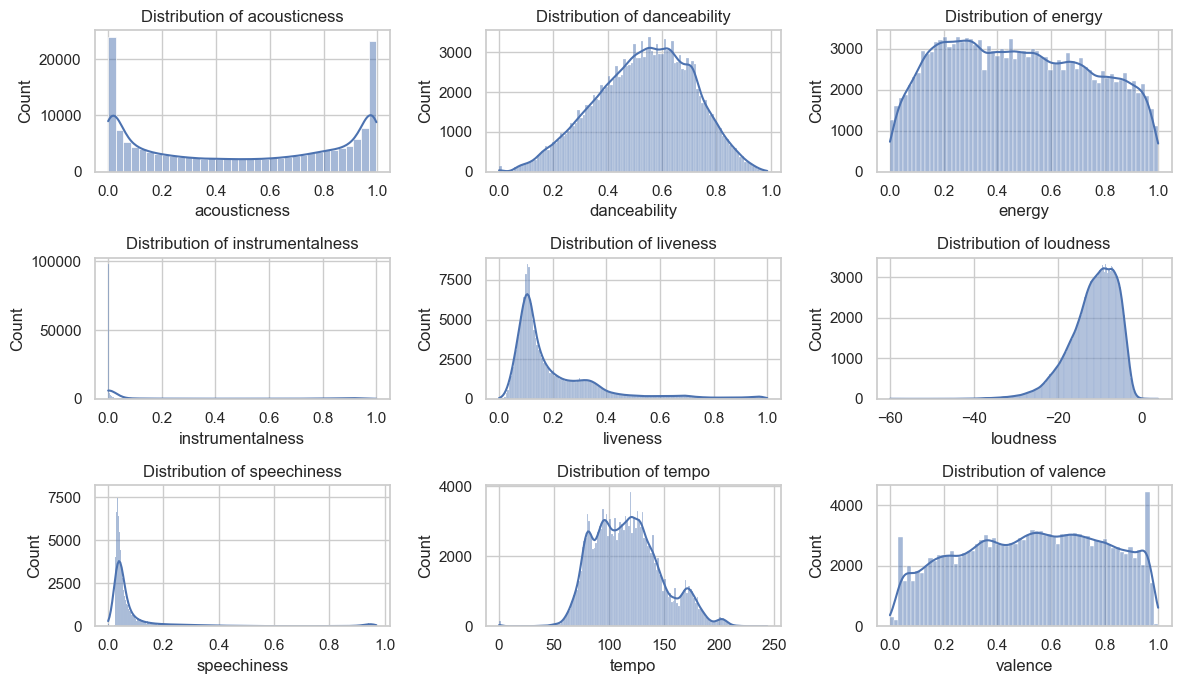

In [11]:
# Plot distributions of audio features
plt.figure(figsize=(12, 7))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### 2. Correlation analysis

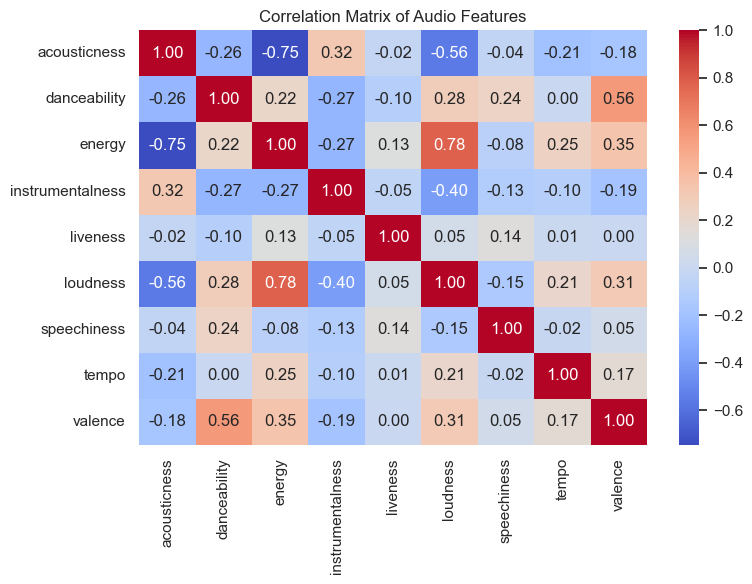

In [13]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[audio_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()

#### 3. Feature trends over time

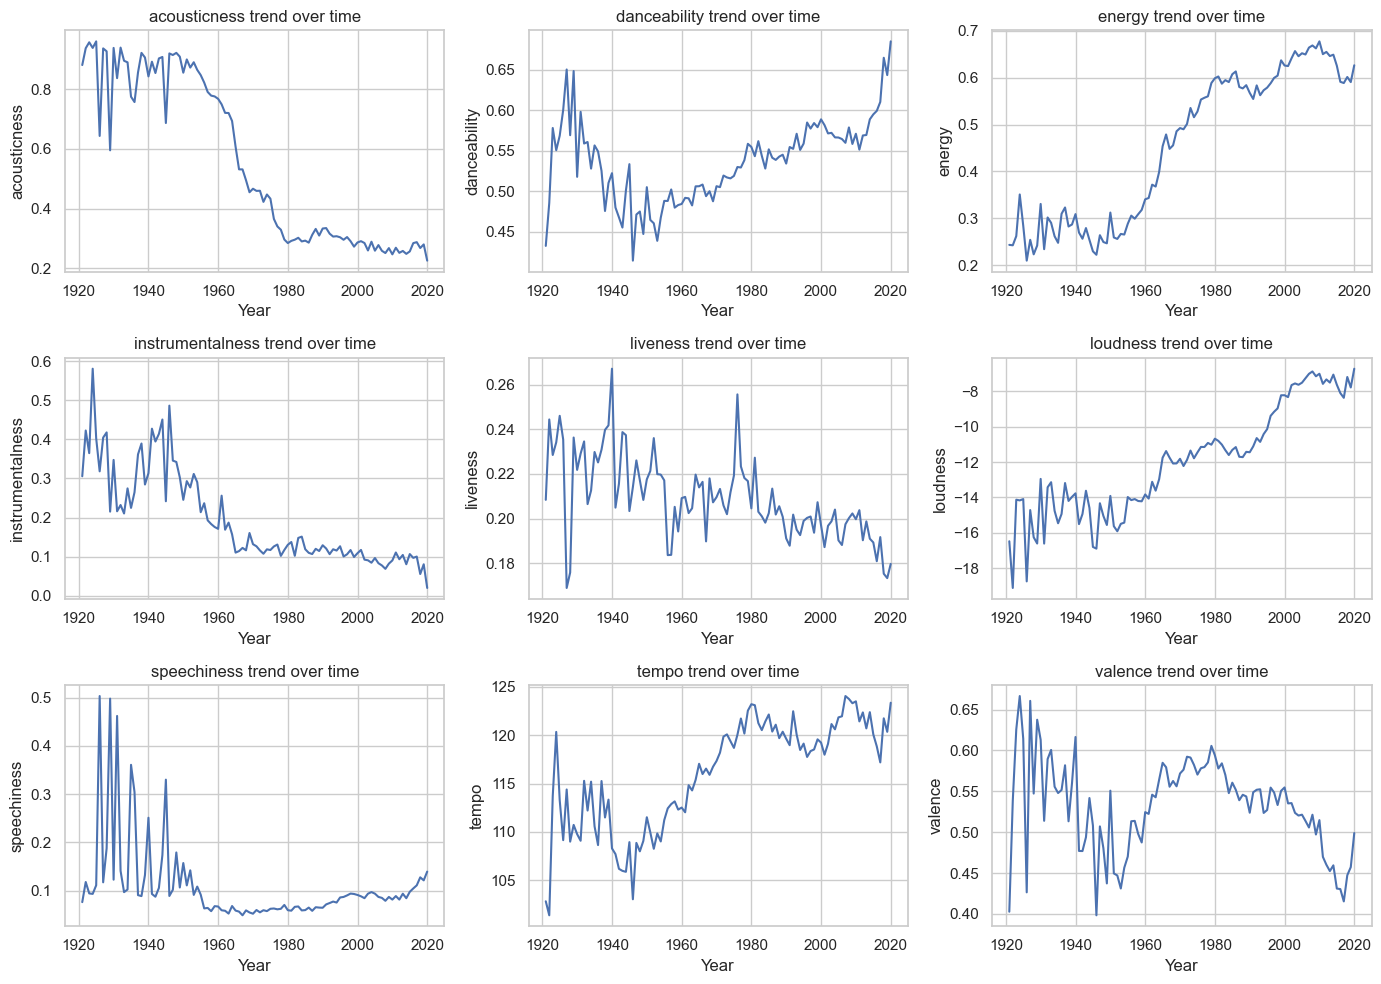

In [15]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i+1)
    yearly_avg = df.groupby('year')[feature].mean()
    plt.plot(yearly_avg.index, yearly_avg.values)
    plt.title(f'{feature} trend over time')
    plt.xlabel('Year')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [16]:
import ast
# Convert stringified lists in 'genres' column back to Python lists
df_w_genres['genres'] = df_w_genres['genres'].apply(ast.literal_eval)

# Explode genres so each genre gets its own row
df_w_genres_exploded = df_w_genres.explode('genres')

# Count frequency of each genre
genre_counts = df_w_genres_exploded['genres'].value_counts().head(15)

print(genre_counts)


genres
rock                  611
pop                   593
dance pop             572
rap                   516
hip hop               507
pop rap               482
pop rock              400
modern rock           400
country rock          394
urban contemporary    383
folk rock             381
latin                 380
soft rock             372
trap                  361
mellow gold           358
Name: count, dtype: int64


#### 4. Genre Analysis

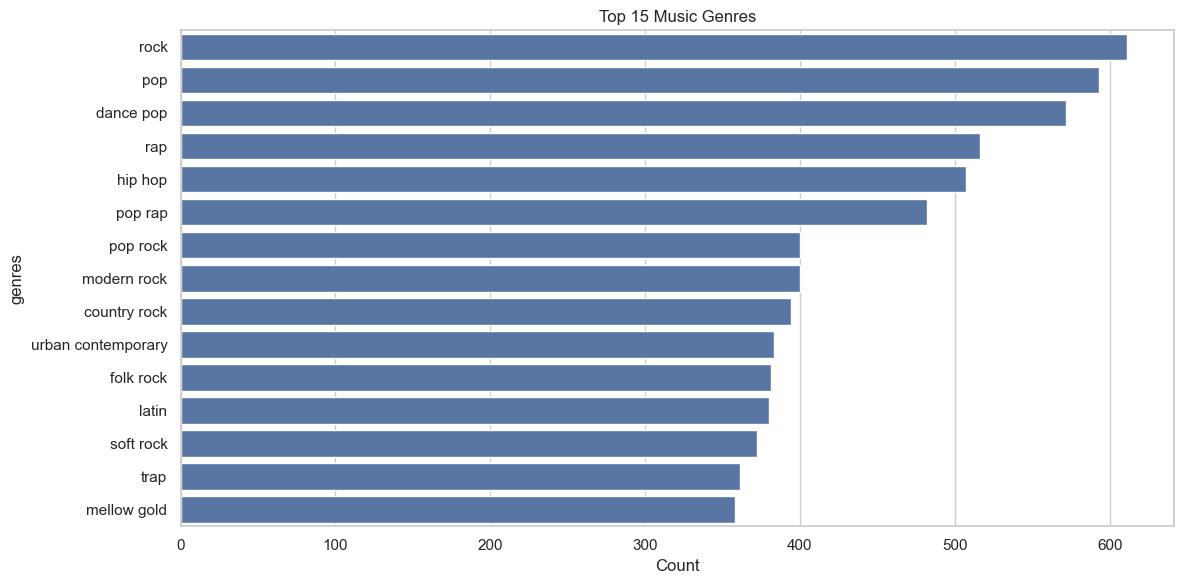

In [18]:
#top_genres = df_w_genres['genres'].explode().value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 15 Music Genres')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

#### 5. Feature comparison by genre

In [20]:
top_5_genres = genre_counts.index[:5]
genre_features = {}

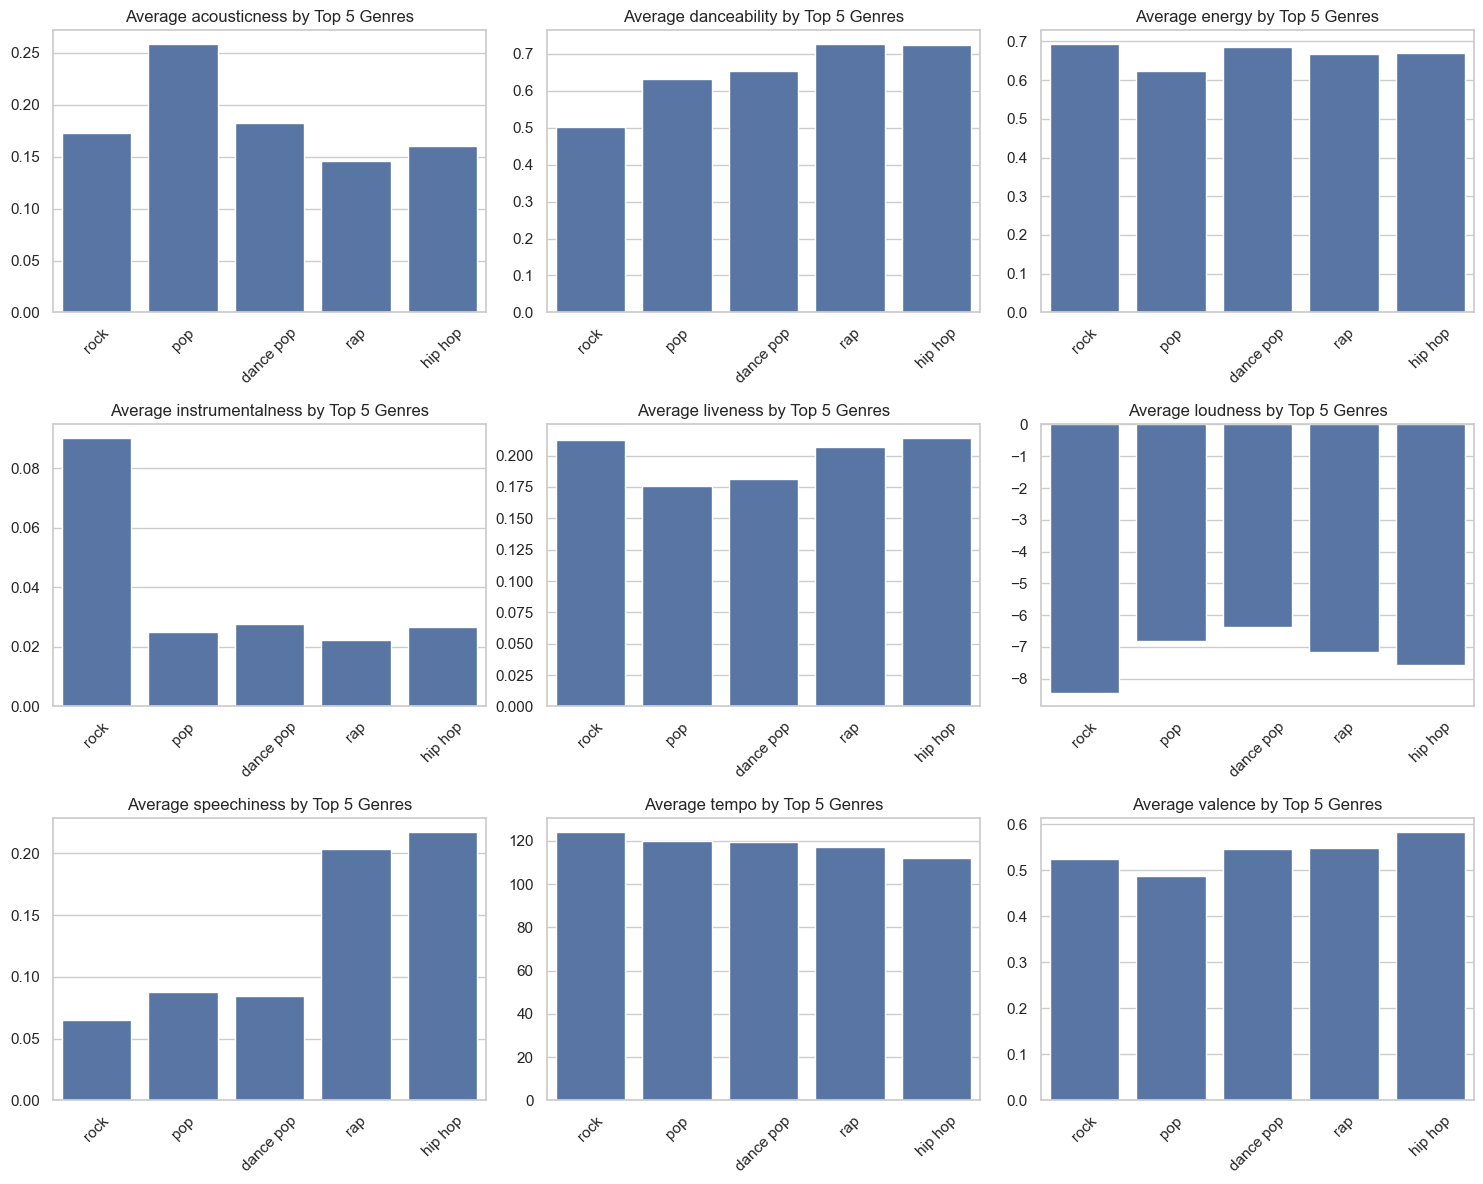

In [21]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i+1)
    # For each top genre, calculate the average feature value
    for genre in top_5_genres:
        genre_data = df_w_genres[df_w_genres['genres'].apply(lambda x: genre in x if isinstance(x, list) else False)]
        if not genre_data.empty:
            avg_value = genre_data[feature].mean()
            if genre not in genre_features:
                genre_features[genre] = {}
            genre_features[genre][feature] = avg_value
    
    genre_names = list(genre_features.keys())
    feature_values = [genre_features[genre].get(feature, 0) for genre in genre_names]
    sns.barplot(x=genre_names, y=feature_values)
    plt.title(f'Average {feature} by Top 5 Genres')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Popularity Analysis

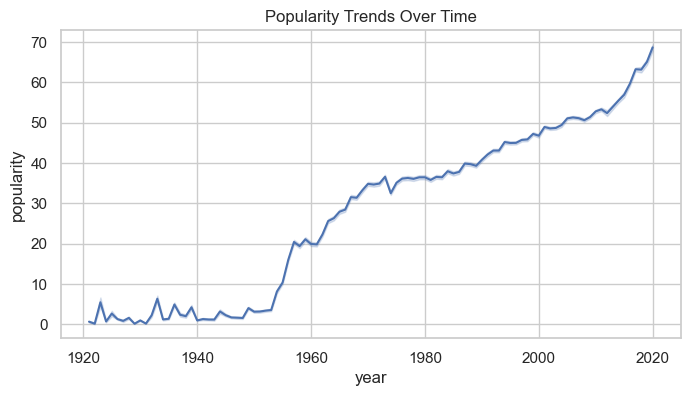

In [23]:
plt.figure(figsize=(8,4))
sns.lineplot(data = df, x = 'year', y = 'popularity')
plt.title('Popularity Trends Over Time')
plt.show()

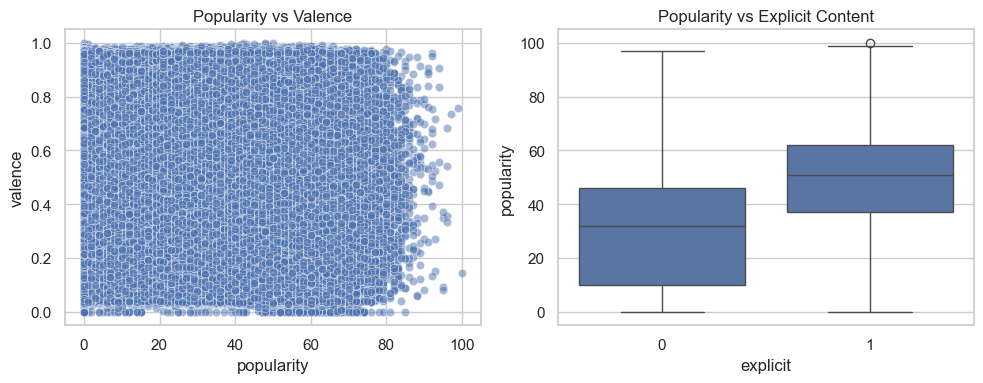

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

sns.scatterplot(data=df, x='popularity', y='valence', alpha=0.5, ax=axes[0])
axes[0].set_title('Popularity vs Valence')

sns.boxplot(data=df, x='explicit', y='popularity', ax=axes[1])
axes[1].set_title('Popularity vs Explicit Content')

plt.tight_layout()
plt.show()

#### 7. Audio feature profiles by decade

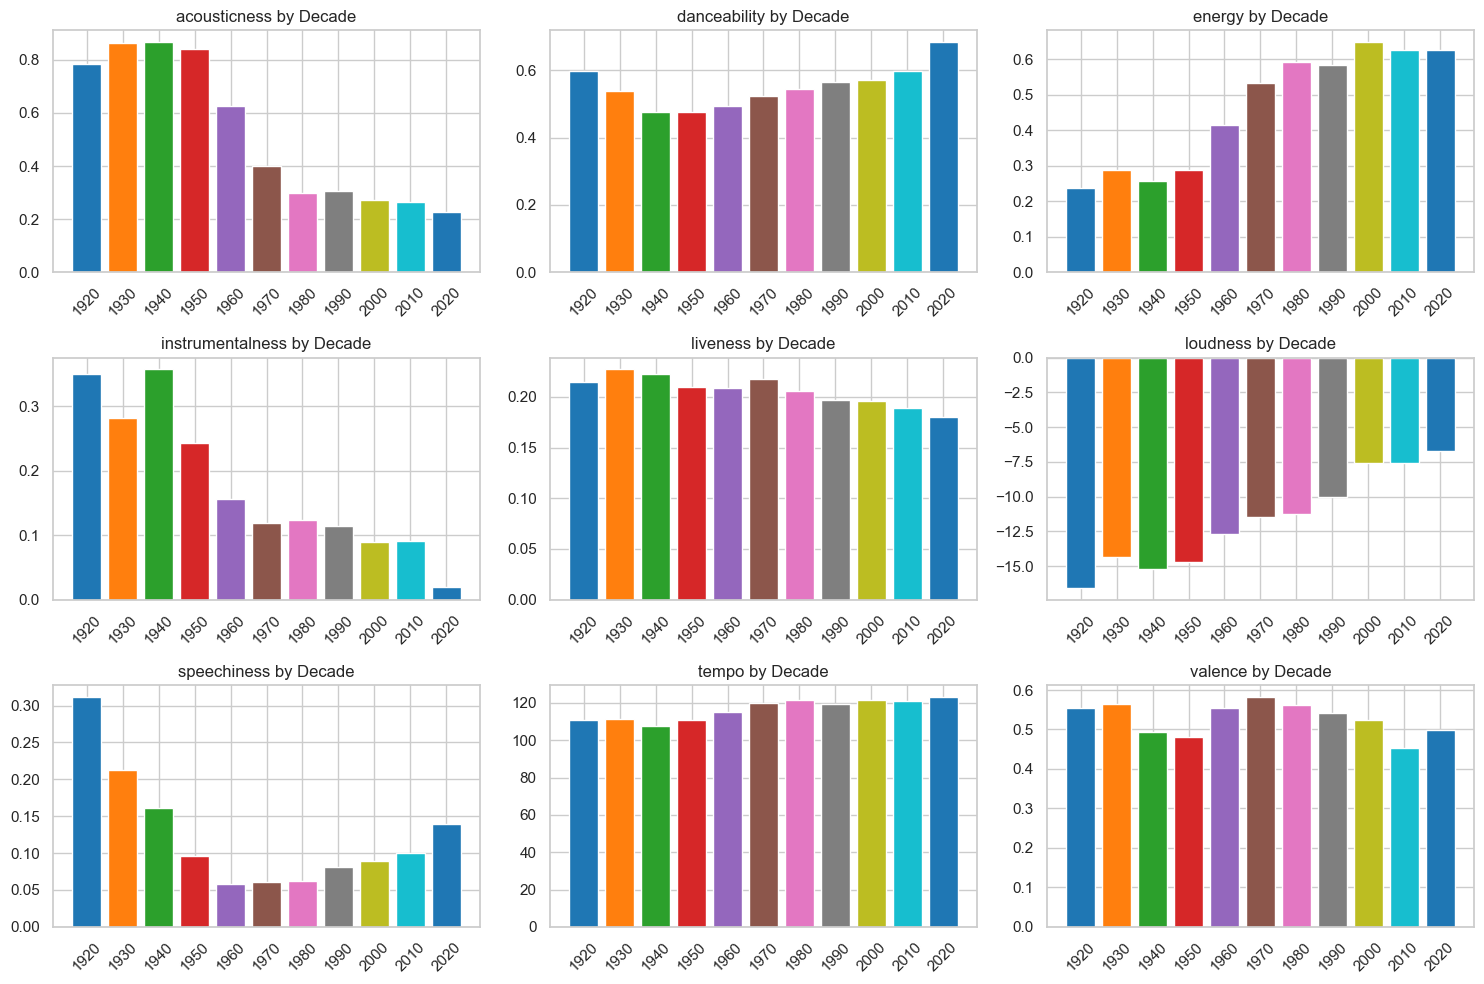

In [26]:
df['decade'] = (df['year'] // 10) * 10

# Grouping by decade and thereafter computing the average feature values
decade_profiles = df.groupby('decade')[audio_features].mean()
# Defining one color per decade to ensure clarity
unique_decades = decade_profiles.index.tolist()
colors = sns.color_palette("tab10", len(unique_decades))
# Map each decade to a specific color
decade_color_map = dict(zip(unique_decades, colors))

plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i + 1)

    # Get values and colors for current feature
    values = decade_profiles[feature]
    bar_colors = [decade_color_map[decade] for decade in values.index]

    # Bar plots with the color-coded decades
    plt.bar(values.index.astype(str), values.values, color=bar_colors)
    plt.title(f'{feature} by Decade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 8. Feature Engineering

In [28]:
# Handling missing values if any exists in the main dataset
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].fillna('Unknown')
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [29]:
df_genres['genres'] = df_genres['genres'].replace('[]', 'Unknown')
print(df_genres[df_genres['genres'] == '[]'])

Empty DataFrame
Columns: [mode, genres, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, key]
Index: []


In [30]:
# Scale the audio features for both the main dataset and the df_genres
scaler = StandardScaler()
X_genres = scaler.fit_transform(df_genres[audio_features])  
X_songs = scaler.transform(df_clean[audio_features])        

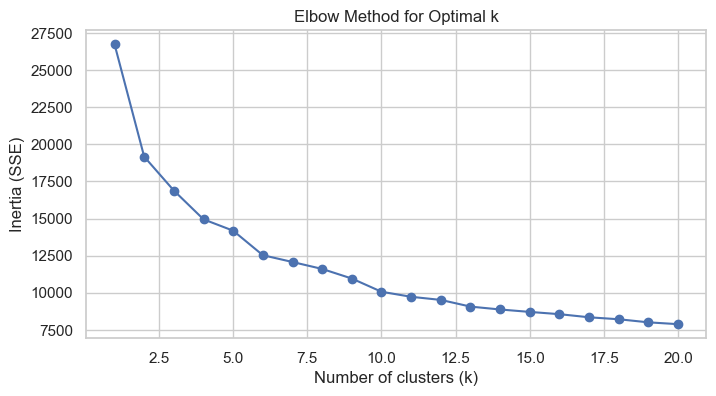

In [31]:
# Calculating the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 21)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_genres)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#### 9 Clustering

In [33]:
# Clustering genre profiles using the audio features
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_genres['genre_cluster'] = kmeans.fit_predict(X_genres)

##### Representative Genre Mapping via Centroid Proximity (RGCP)

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

# Cluster centroids in original feature space
centroids = kmeans.cluster_centers_  # already in PCA space

# To find closest genre (in PCA space)
def get_closest_genre(centroid):
    distances = euclidean_distances([centroid], X_genres)
    return df_genres.iloc[distances.argmin()]['genres']

cluster_to_genre = {
    i: get_closest_genre(center) for i, center in enumerate(kmeans.cluster_centers_)
}

In [36]:
cluster_to_genre

{0: 'psychedelic folk',
 1: 'slamming deathcore',
 2: 'blues',
 3: 'gruperas inmortales',
 4: 'chamber orchestra',
 5: 'ninja',
 6: 'reading',
 7: 'pop rock',
 8: 'chicago rap',
 9: 'danish pop rock'}

In [37]:
# Manual overrides for vague genre labels by replacing with more encompassing labels
manual_overrides = {
    0: 'Indie / Folk',
    1: 'Metal / Hardcore Punk',
    2: 'Jazz / Blues',
    3: 'Soft Rock',
    4: 'Classical',
    5: 'Electronic / Synth-Pop / Experimental Music',
    6: 'Audiobooks / Spoken Word',
    7: 'Pop',
    8: 'Hiphop / Rap',
    9: 'Funk / Soul'
}

cluster_to_genre.update(manual_overrides)

In [38]:
# Assigning each song to the main data(data.csv) nearest genre cluster
df_clean['genre_cluster'] = kmeans.predict(X_songs)
df_clean['genres'] = df_clean['genre_cluster'].map(cluster_to_genre)

In [39]:
# Dropping genre_cluster column as it's no longer needed
df_clean.drop(columns=['genre_cluster'], inplace=True)

In [40]:
# Feature scaling for recommendation systems
features_to_scale = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [41]:
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

In [42]:
#Creating a song feature matrix for content-based filtering to ensure that no single feature dominates due to its scale
song_features = df_scaled[features_to_scale].values

In [43]:
#Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)
song_features_2d = pca.fit_transform(song_features)

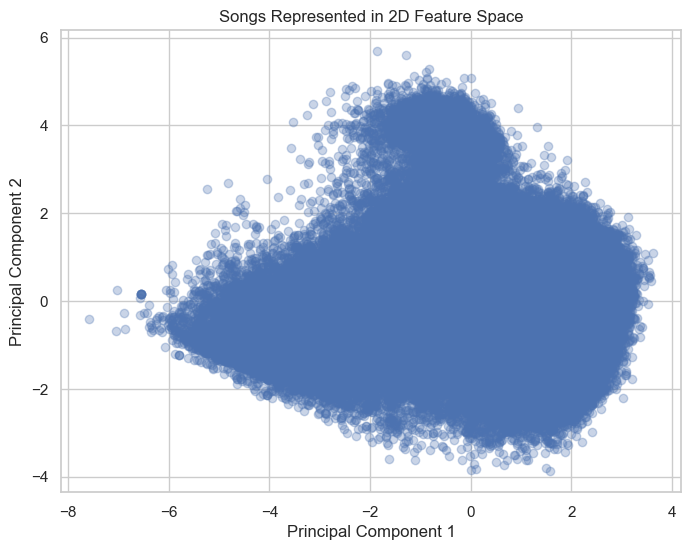

In [44]:
# Visualize songs in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(song_features_2d[:, 0], song_features_2d[:, 1], alpha=0.3)
plt.title('Songs Represented in 2D Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [45]:
#Save processed data for the recommendation system
import os

if not os.path.exists('processed_music_data.csv'):
    df_clean.to_csv('processed_music_data.csv', index=False)
else:
    print("File already exists, skipping save")


File already exists, skipping save


### Creating the Recommendation System

#### 1. Content-based recommendation using song features

In [48]:
# Recommend songs similar to the input song based on audio features

def get_content_based_recommendations(song_name, df=df_clean, feature_matrix=song_features, top_n=10):
    try:
        # Debug: Show what we're searching for
        print(f"Searching for song: '{song_name}'")
        
        # More flexible song matching (case-insensitive, partial match)
        song_matches = df[df['name'].str.contains(song_name, case=False, na=False)]
        
        if song_matches.empty:
            # Try exact match as fallback
            song_matches = df[df['name'] == song_name]
            
        if song_matches.empty:
            # Show similar song names for debugging
            similar_names = df[df['name'].str.contains(song_name.split()[0], case=False, na=False)]['name'].head(5)
            return f"Song '{song_name}' not found in dataset.\nSimilar songs found: {similar_names.tolist()}"
        
        # If multiple matches, take the first one (most popular)
        if len(song_matches) > 1:
            print(f"Multiple matches found for '{song_name}'. Using: '{song_matches.iloc[0]['name']}'")
            song_idx = song_matches.index[0]
        else:
            song_idx = song_matches.index[0]
            
        print(f"Found song at index {song_idx}: '{df.loc[song_idx, 'name']}' by {df.loc[song_idx, 'artists']}")
        
        # Validate feature matrix dimensions
        if song_idx >= len(feature_matrix):
            return f"Error: Song index {song_idx} is out of range for feature matrix (size: {len(feature_matrix)})"
        
        # Calculate similarity scores
        similarity_scores = cosine_similarity([feature_matrix[song_idx]], feature_matrix)[0]
        
        # Get indices of top similar songs (excluding the input song)
        similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
        
        # Return the recommended songs
        recommendations = df.iloc[similar_indices][['name', 'artists', 'popularity']].copy()
        recommendations['similarity_score'] = similarity_scores[similar_indices]
        
        print(f"Found {len(recommendations)} similar songs")
        return recommendations
        
    except IndexError as e:
        return f"IndexError: {str(e)} - Song may not be found in the dataset"
    except Exception as e:
        return f"Error occurred: {str(e)}"

#### 2. Genre-based recommendation

In [50]:
# Recommend top songs from a specific genre
def get_genre_based_recommendations(genre, df=df_clean, top_n=10):
    # checking what the genres column looks like at first
    print(f"Searching for genre: '{genre}'")
    print(f"Sample genres in dataset: {df['genres'].head().tolist()}")
    
    if df['genres'].dtype == 'object':
        # If genres is stored as strings, then this will be applicable
        genre_songs = df[df['genres'].str.contains(genre, case=False, na=False)]
    else:
        # If genres is stored as lists as in the case of the data_w_genres.csv
        genre_songs = df[df['genres'].apply(
            lambda x: genre.lower() in [g.lower() for g in x] if isinstance(x, list) else False
        )]
    
    print(f"Found {len(genre_songs)} songs matching '{genre}'")
     
    if genre_songs.empty:
        unique_genres = df['genres'].unique()[:10]  # Show first 10 unique values
        return f"No songs found for genre: '{genre}'\nAvailable genres sample: {unique_genres}"
    
    # Sort by popularity and return top_n
    top_songs = genre_songs.sort_values('popularity', ascending=False).head(top_n)
    
    return top_songs[['artists', 'genres', 'popularity']]

#### 3. Hybrid recommendation - combining content and popularity

In [52]:
def get_hybrid_recommendations(song_name, df=df_clean, feature_matrix=song_features, 
                             top_n=10, popularity_weight=0.3, show_details=True):
    """
    Enhanced hybrid recommendation system combining content similarity and popularity
    Parameters:
    - song_name: Name of the input song
    - popularity_weight: Weight for popularity (0=pure similarity, 1=pure popularity)
    - show_details: Whether to show detailed statistics and explanations
    """
    
    try:
        if show_details:
            print(f" Finding recommendations for: '{song_name}'")
            print(f"Hybrid balance: {(1-popularity_weight)*100:.0f}% similarity + {popularity_weight*100:.0f}% popularity")
        
        song_matches = df[df['name'].str.contains(song_name, case=False, na=False)]
        
        if song_matches.empty:
            # Trying exact match as fallback
            song_matches = df[df['name'] == song_name]
            
        if song_matches.empty:
            # Show similar song names
            similar_names = df[df['name'].str.contains(song_name.split()[0], case=False, na=False)]['name'].head(5)
            return f" Song '{song_name}' not found.\n Similar songs: {similar_names.tolist()}"
        
        # incase of multiple matches, the system chooses the most popular
        if len(song_matches) > 1:
            if show_details:
                print(f" Multiple matches found:")
                for idx, (_, song) in enumerate(song_matches.head(3).iterrows()):
                    print(f"   {idx+1}. '{song['name']}' by {song['artists']} (popularity: {song['popularity']})")
            song_idx = song_matches.loc[song_matches['popularity'].idxmax()].name
            chosen_song = song_matches.loc[song_idx]
        else:
            song_idx = song_matches.index[0]
            chosen_song = song_matches.iloc[0]
            
        if show_details:
            print(f" Selected: '{chosen_song['name']}' by {chosen_song['artists']}")
            print(f" Original song popularity: {chosen_song['popularity']}")
        
        # Validate feature matrix dimensions
        if song_idx >= len(feature_matrix):
            return f" Error: Song index {song_idx} out of range for feature matrix (size: {len(feature_matrix)})"
        
        # Calculate similarity scores
        similarity_scores = cosine_similarity([feature_matrix[song_idx]], feature_matrix)[0]
        
        # Create recommendations dataframe
        recommendations = df.copy()
        recommendations['similarity'] = similarity_scores
        
        # Normalize popularity to 0-1 scale for fair weighting
        max_popularity = recommendations['popularity'].max()
        min_popularity = recommendations['popularity'].min()
        
        if max_popularity > min_popularity:
            recommendations['norm_popularity'] = (recommendations['popularity'] - min_popularity) / (max_popularity - min_popularity)
        else:
            recommendations['norm_popularity'] = 0.5 
        
        # Calculate hybrid score with weighted combination
        recommendations['hybrid_score'] = (
            (1 - popularity_weight) * recommendations['similarity'] + 
            popularity_weight * recommendations['norm_popularity']
        )
        
        # Filter out the input song and get top recommendations
        mask = recommendations.index != song_idx
        top_recommendations = recommendations[mask].sort_values('hybrid_score', ascending=False).head(top_n)
        
        if show_details:
            print(f" Found {len(top_recommendations)} recommendations")
        
        # columns to return
        result_columns = ['name', 'artists', 'popularity', 'genres', 'similarity', 'hybrid_score']        
        return top_recommendations[result_columns].round(4)
        
    except IndexError as e:
        return f" IndexError: {str(e)} - Song may not be in dataset"
    except Exception as e:
        return f" Error: {str(e)}"

In [53]:
recommendations = get_hybrid_recommendations('Shape of you', popularity_weight=0.3)
recommendations

 Finding recommendations for: 'Shape of you'
Hybrid balance: 70% similarity + 30% popularity
 Selected: 'Shape of You' by ['Ed Sheeran']
 Original song popularity: 85
 Found 10 recommendations


,name,artists,popularity,genres,similarity,hybrid_score
36326,Tick Tock (feat. 24kGoldn),"['Clean Bandit', 'Mabel', '24kGoldn']",88,Soft Rock,0.9667,0.9407
18226,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",85,Soft Rock,0.9553,0.9237
53929,Me Gusta (with Cardi B & Myke Towers),"['Anitta', 'Myke Towers', 'Cardi B']",85,Soft Rock,0.9494,0.9196
101188,El Efecto,"['Rauw Alejandro', 'Chencho Corleone']",81,Soft Rock,0.9519,0.9094
18241,Magic In The Hamptons (feat. Lil Yachty),"['Social House', 'Lil Yachty']",80,Soft Rock,0.9555,0.9089
36328,Mi Niña,"['Wisin', 'Myke Towers', 'Los Legendarios']",90,Hiphop / Rap,0.9093,0.9065
16138,Because Of You,['Ne-Yo'],76,Soft Rock,0.9642,0.9029
130286,On the Low,['Burna Boy'],73,Soft Rock,0.9765,0.9026
36339,Stunnin' (feat. Harm Franklin),"['Curtis Waters', 'Harm Franklin']",81,Soft Rock,0.9411,0.9018
85792,Amanece,"['Anuel AA', 'Haze']",73,Soft Rock,0.9736,0.9005


#### 4. Mood-based recommendation

In [55]:
# Recommend songs based on mood leveraging enhanced filtering and statistics
def get_mood_based_recommendations(mood, df=df_clean, top_n=10, randomize=False, show_stats=True):
    """    
    Available moods for consideration:
    - 'happy': high valence, high energy
    - 'sad': low valence, low energy  
    - 'energetic': high energy, high tempo
    - 'calm': low energy, low tempo
    - 'danceable': high danceability
    - 'romantic': moderate tempo, high valence, moderate energy
    - 'party': high danceability, high energy, high valence
    - 'focus': low valence, moderate energy, instrumental preference
    """
    
    mood = mood.lower().strip()
    
    if show_stats:
        print(f" Searching for {mood.upper()} songs...")
        print(f"Dataset contains {len(df)} total songs")
    
    # Define mood filters based on select audio features
    if mood == 'happy':
        valence_thresh = df['valence'].quantile(0.75)
        energy_thresh = df['energy'].quantile(0.6)
        filtered_df = df[(df['valence'] > valence_thresh) & (df['energy'] > energy_thresh)]
        
    elif mood == 'sad':
        valence_thresh = df['valence'].quantile(0.25)
        energy_thresh = df['energy'].quantile(0.4)
        filtered_df = df[(df['valence'] < valence_thresh) & (df['energy'] < energy_thresh)]
        
    elif mood == 'energetic':
        energy_thresh = df['energy'].quantile(0.85)
        tempo_thresh = df['tempo'].quantile(0.75)
        filtered_df = df[(df['energy'] > energy_thresh) & (df['tempo'] > tempo_thresh)]
        
    elif mood == 'calm' or mood == 'chill':
        energy_thresh = df['energy'].quantile(0.3)
        tempo_thresh = df['tempo'].quantile(0.4)
        filtered_df = df[(df['energy'] < energy_thresh) & (df['tempo'] < tempo_thresh)]
        
    elif mood == 'danceable' or mood == 'dance':
        dance_thresh = df['danceability'].quantile(0.75)
        energy_thresh = df['energy'].quantile(0.5)
        filtered_df = df[(df['danceability'] > dance_thresh) & (df['energy'] > energy_thresh)]
        
    elif mood == 'romantic':
        valence_thresh_low = df['valence'].quantile(0.4)
        valence_thresh_high = df['valence'].quantile(0.8)
        energy_thresh_low = df['energy'].quantile(0.3)
        energy_thresh_high = df['energy'].quantile(0.7)
        filtered_df = df[(df['valence'] > valence_thresh_low) & (df['valence'] < valence_thresh_high) &
                        (df['energy'] > energy_thresh_low) & (df['energy'] < energy_thresh_high)]
        
    elif mood == 'party':
        dance_thresh = df['danceability'].quantile(0.7)
        energy_thresh = df['energy'].quantile(0.7)
        valence_thresh = df['valence'].quantile(0.6)
        filtered_df = df[(df['danceability'] > dance_thresh) & 
                        (df['energy'] > energy_thresh) & 
                        (df['valence'] > valence_thresh)]
        
    elif mood == 'focus' or mood == 'study':
        # Instrumental should be prioritized if there occurs moderate energy and lower valence
        energy_thresh_low = df['energy'].quantile(0.2)
        energy_thresh_high = df['energy'].quantile(0.6)
        valence_thresh = df['valence'].quantile(0.5)
        filtered_df = df[(df['energy'] > energy_thresh_low) & 
                        (df['energy'] < energy_thresh_high) & 
                        (df['valence'] < valence_thresh)]
        # Prefer instrumental if available
        if 'instrumentalness' in df.columns:
            instrumental_thresh = df['instrumentalness'].quantile(0.3)
            filtered_df = filtered_df[filtered_df['instrumentalness'] > instrumental_thresh]
            
    else:
        available_moods = ['happy', 'sad', 'energetic', 'calm', 'danceable', 'romantic', 'party', 'focus']
        return f" Invalid mood: '{mood}'\n Available moods: {', '.join(available_moods)}"
    
    if filtered_df.empty:
        return f" No songs found for mood: '{mood}'. Try adjusting the criteria or choosing a different mood."
    
    if show_stats:
        print(f" Found {len(filtered_df)} songs matching '{mood}' criteria")
        
        # Show mood characteristics
        if len(filtered_df) > 0:
            avg_stats = {
                'valence': filtered_df['valence'].mean(),
                'energy': filtered_df['energy'].mean(),
                'tempo': filtered_df['tempo'].mean(),
                'danceability': filtered_df['danceability'].mean()
            }
            print(" Average characteristics:")
            for stat, value in avg_stats.items():
                print(f"   {stat.capitalize()}: {value:.2f}")
    
    if randomize:
        top_songs = filtered_df.sample(n=min(top_n, len(filtered_df)), random_state=42)
        if show_stats:
            print(f" Randomly selected {len(top_songs)} songs")
    else:
        top_songs = filtered_df.sort_values('popularity', ascending=False).head(top_n)
        if show_stats:
            print(f" Selected top {len(top_songs)} most popular songs")
    
    # Return results with mood-relevant columns
    result_columns = ['name', 'artists', 'popularity']
    
    # Add mood-specific columns
    if mood in ['happy', 'sad', 'romantic']:
        result_columns.extend(['valence', 'energy'])
    elif mood in ['energetic', 'calm']:
        result_columns.extend(['energy', 'tempo'])
    elif mood in ['danceable', 'party']:
        result_columns.extend(['danceability', 'energy', 'valence'])
    elif mood == 'focus':
        result_columns.extend(['energy', 'valence'])
        if 'instrumentalness' in df.columns:
            result_columns.append('instrumentalness')
    
    # Add genres if available
    if 'genres' in df.columns:
        result_columns.append('genres')
    
    return top_songs[result_columns].round(3)

In [56]:
# Create a mixed playlist from multiple moods 
def get_mood_playlist(moods_list, df=df_clean, songs_per_mood=5):
    playlist = pd.DataFrame()
    
    print(f" Creating playlist with moods: {', '.join(moods_list)}")
    
    for mood in moods_list:
        mood_songs = get_mood_based_recommendations(
            mood, df, top_n=songs_per_mood, show_stats=False
        )
        if isinstance(mood_songs, pd.DataFrame):
            mood_songs['mood_category'] = mood
            playlist = pd.concat([playlist, mood_songs], ignore_index=True)
        else:
            print(f" Could not get songs for mood: {mood}")
    
    if not playlist.empty:
        # Shuffle the final playlist
        playlist = playlist.sample(frac=1, random_state=42).reset_index(drop=True)
        print(f" Playlist created with {len(playlist)} songs!")
    
    return playlist

#### 5. Era-based recommendation

In [58]:
def get_era_based_recommendations(start_year, end_year, df=df_clean, top_n=10, show_stats = True, sort_by='popularity'):
    """
    Recommend top songs from a specific era
    """

    if show_stats:
        print(f" Searching for songs from {start_year} to {end_year}")
        print(f" Dataset year range: {df['year'].min()} - {df['year'].max()}")
    
    era_songs = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    if era_songs.empty:
        nearby_years = df[(df['year'] >= start_year - 5) & (df['year'] <= end_year + 5)]['year'].unique()
        return f" No songs found for years: {start_year}-{end_year}\n Nearby years available: {sorted(nearby_years)}"
    if show_stats:
        print(f" Found {len(era_songs)} songs from {start_year}-{end_year}")
    
    if era_songs.empty:
        return f"No songs found for years: {start_year}-{end_year}"

    # Sort songs based on preference
    if sort_by == 'popularity':
        top_songs = era_songs.sort_values('popularity', ascending=False).head(top_n)
        sort_desc = "most popular"
    elif sort_by == 'year':
        top_songs = era_songs.sort_values(['year', 'popularity'], ascending=[True, False]).head(top_n)
        sort_desc = "chronologically"
    elif sort_by == 'random':
        top_songs = era_songs.sample(n=min(top_n, len(era_songs)), random_state=42)
        sort_desc = "randomly selected"
    elif sort_by in era_songs.columns:
        # Sort by audio feature
        top_songs = era_songs.sort_values(sort_by, ascending=False).head(top_n)
        sort_desc = f"highest {sort_by}"
    else:
        top_songs = era_songs.sort_values('popularity', ascending=False).head(top_n)
        sort_desc = "most popular (default)"
    
    if show_stats:
        print(f" Selected {len(top_songs)} {sort_desc} songs")
    
    result_columns = ['name', 'artists', 'year', 'popularity', 'genres']
    
    return top_songs[result_columns]

##### Example usage:

##### Get recommendations for a song

In [61]:
sample_song = "Poetic Justice"
#sample_song = df_clean['name'].iloc[5] 
print(f"Getting recommendations for: {sample_song}")
recommendations = get_content_based_recommendations(sample_song)
display(recommendations)

Getting recommendations for: Poetic Justice
Searching for song: 'Poetic Justice'
Found song at index 17069: 'Poetic Justice' by ['Kendrick Lamar', 'Drake']
Found 10 similar songs


,name,artists,popularity,similarity_score
70403,Yikes,['Nicki Minaj'],73,0.989410
97458,Rinky Dink II/We're Gonna Rumble,['Project Pat'],39,0.978692
100850,For Real,['Lil Uzi Vert'],59,0.974208
115661,LA LA,['Ski Mask The Slump God'],61,0.971268
35267,Bobby Bitch,['Bobby Shmurda'],61,0.966137
157226,SMASH! - feat. PnB Rock,"['XXXTENTACION', 'PnB Rock']",61,0.965931
116029,Nah Nah Nah,['Kanye West'],70,0.963312
31786,My Mind Went Blank,"['DJ Screw', 'Point Blank']",48,0.962998
69999,New Freezer (feat. Kendrick Lamar),"['Rich The Kid', 'Kendrick Lamar']",67,0.962325
65525,9 Little Millimeta Boys,['8Ball & MJG'],38,0.961793


##### Get recommendations for a song based on genre

In [63]:
print("\nTop rap songs:")
rap_recommendations = get_genre_based_recommendations('Hiphop / Rap')
display(rap_recommendations)


Top rap songs:
Searching for genre: 'Hiphop / Rap'
Sample genres in dataset: ['Funk / Soul', 'Hiphop / Rap', 'Classical', 'Indie / Folk', 'Indie / Folk']
Found 9069 songs matching 'Hiphop / Rap'


,artists,genres,popularity
18620,['Pop Smoke'],Hiphop / Rap,96
18616,"['Cardi B', 'Megan Thee Stallion']",Hiphop / Rap,96
18623,"['Justin Bieber', 'Chance the Rapper']",Hiphop / Rap,95
18615,"['Pop Smoke', 'Lil Baby', 'DaBaby']",Hiphop / Rap,95
18617,"['Drake', 'Lil Durk']",Hiphop / Rap,93
18622,['Ariana Grande'],Hiphop / Rap,92
18437,"['Topic', 'A7S']",Hiphop / Rap,92
36308,['Farruko'],Hiphop / Rap,92
18748,['Maluma'],Hiphop / Rap,92
53790,"['Maluma', 'Lenny Tavárez', 'Justin Quiles']",Hiphop / Rap,91


##### Get mood-based recommendations

In [65]:
print("\nDanceable songs:")
happy_recommendations = get_mood_based_recommendations('danceable')
display(happy_recommendations)


Danceable songs:
 Searching for DANCEABLE songs...
Dataset contains 157685 total songs
 Found 24097 songs matching 'danceable' criteria
 Average characteristics:
   Valence: 0.71
   Energy: 0.68
   Tempo: 116.31
   Danceability: 0.76
 Selected top 10 most popular songs


,name,artists,popularity,danceability,energy,valence,genres
18619,Dakiti,"['Bad Bunny', 'Jhay Cortez']",100,0.731,0.573,0.145,Pop
18614,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99,0.700,0.722,0.756,Soft Rock
18626,Dynamite,['BTS'],97,0.746,0.765,0.737,Soft Rock
18618,positions,['Ariana Grande'],96,0.737,0.802,0.682,Soft Rock
18620,What You Know Bout Love,['Pop Smoke'],96,0.709,0.548,0.543,Hiphop / Rap
18615,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",95,0.823,0.586,0.347,Hiphop / Rap
18623,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",95,0.673,0.704,0.372,Hiphop / Rap
18663,Head & Heart (feat. MNEK),"['Joel Corry', 'MNEK']",94,0.734,0.874,0.905,Soft Rock
18621,Lemonade,"['Internet Money', 'Gunna', 'Don Toliver', 'NAV']",94,0.799,0.660,0.471,Pop
18727,Relación - Remix,"['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...",94,0.793,0.771,0.835,Soft Rock


##### Getting customized playlists for different moods

In [67]:
moods = ['happy', 'energetic', 'dance']
playlist = get_mood_playlist(moods)
display(playlist)

 Creating playlist with moods: happy, energetic, dance
 Playlist created with 15 songs!


,name,artists,popularity,valence,energy,genres,mood_category,tempo
0,Thunder,['Imagine Dragons'],84,NaN,0.822,Metal / Hardcore Punk,energetic,167.997
1,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99,NaN,NaN,Soft Rock,dance,NaN
2,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99,0.756,0.722,Soft Rock,happy,NaN
3,positions,['Ariana Grande'],96,NaN,NaN,Soft Rock,dance,NaN
4,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",90,NaN,0.814,Pop,energetic,144.991
5,'Till I Collapse,"['Eminem', 'Nate Dogg']",84,NaN,0.847,Metal / Hardcore Punk,energetic,171.447
6,Relación - Remix,"['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...",94,0.835,0.771,Soft Rock,happy,NaN
7,Head & Heart (feat. MNEK),"['Joel Corry', 'MNEK']",94,0.905,0.874,Soft Rock,happy,NaN
8,What You Know Bout Love,['Pop Smoke'],96,NaN,NaN,Hiphop / Rap,dance,NaN
9,Take You Dancing,['Jason Derulo'],92,0.753,0.711,Soft Rock,happy,NaN


##### Getting era based recommendations

In [69]:
get_era_based_recommendations(2015, 2020, top_n=10, sort_by = 'energy')

 Searching for songs from 2015 to 2020
 Dataset year range: 1921 - 2020
 Found 11170 songs from 2015-2020
 Selected 10 highest energy songs


,name,artists,year,popularity,genres
101252,Steady Forest Rain,['Creatress'],2020,72,Funk / Soul
157025,Ocean For Sleep,['Waves Hard'],2017,57,Funk / Soul
156733,Soggy Afternoon,['Outside Broadcast Recordings'],2015,52,Funk / Soul
69781,Moderate Rain,['Rain Sounds ACE'],2017,66,Funk / Soul
36107,Forest Rain,['Rain Recordings'],2019,74,Funk / Soul
70481,Heavy Rain,['Epic Soundscapes'],2020,74,Funk / Soul
85589,Dripping Rain,['The Rain Library'],2017,65,Funk / Soul
143420,Sleep: Good Night Waves,['Lullaby Waves'],2017,57,Funk / Soul
69816,River Rain,['Dreams of Dreams'],2017,66,Funk / Soul
115335,Timeless Rain,['Thunderbound Productions'],2017,62,Funk / Soul


##### Unified Music Recommendation Tool

In [71]:
def recommend_songs(input_type, input_value, recommendation_type='content', top_n=10):
    """
    Unified recommendation function
    
    Parameters:
    - input_type: 'song', 'genre', 'mood', 'era'
    - input_value: song name, genre name, mood, or [start_year, end_year]
    - recommendation_type: 'content', 'hybrid', 'popularity'
    - top_n: number of recommendations
    """
    if input_type == 'song':
        if recommendation_type == 'content':
            return get_content_based_recommendations(input_value, top_n=top_n)
        elif recommendation_type == 'hybrid':
            return get_hybrid_recommendations(input_value, top_n=top_n)
        else:
            return {"error":"Invalid recommendation type for songs"}
    
    elif input_type == 'genre':
        return get_genre_based_recommendations(input_value, top_n=top_n)
    
    elif input_type == 'mood':
        return get_mood_based_recommendations(input_value, top_n=top_n)
    
    elif input_type == 'era':
        if isinstance(input_value, list) and len(input_value) == 2:
            return get_era_based_recommendations(input_value[0], input_value[1], top_n=top_n)
        else:
            return {"error":"Era should be provided as [start_year, end_year]"}
    
    else:
        return {"error":"Invalid input type. Choose from: song, genre, mood, era"}

In [72]:
recommend_songs('song', 'Shape of You', recommendation_type='hybrid', top_n=5)

 Finding recommendations for: 'Shape of You'
Hybrid balance: 70% similarity + 30% popularity
 Selected: 'Shape of You' by ['Ed Sheeran']
 Original song popularity: 85
 Found 5 recommendations


,name,artists,popularity,genres,similarity,hybrid_score
36326,Tick Tock (feat. 24kGoldn),"['Clean Bandit', 'Mabel', '24kGoldn']",88,Soft Rock,0.9667,0.9407
18226,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",85,Soft Rock,0.9553,0.9237
53929,Me Gusta (with Cardi B & Myke Towers),"['Anitta', 'Myke Towers', 'Cardi B']",85,Soft Rock,0.9494,0.9196
101188,El Efecto,"['Rauw Alejandro', 'Chencho Corleone']",81,Soft Rock,0.9519,0.9094
18241,Magic In The Hamptons (feat. Lil Yachty),"['Social House', 'Lil Yachty']",80,Soft Rock,0.9555,0.9089


In [73]:
recommend_songs('mood', 'energetic')

 Searching for ENERGETIC songs...
Dataset contains 157685 total songs
 Found 8763 songs matching 'energetic' criteria
 Average characteristics:
   Valence: 0.58
   Energy: 0.90
   Tempo: 159.14
   Danceability: 0.46
 Selected top 10 most popular songs


,name,artists,popularity,energy,tempo,genres
18630,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",90,0.814,144.991,Pop
18428,Golden,['Harry Styles'],89,0.838,139.863,Metal / Hardcore Punk
36265,I CAN'T STOP ME,['TWICE'],86,0.880,150.084,Pop
15160,'Till I Collapse,"['Eminem', 'Nate Dogg']",84,0.847,171.447,Metal / Hardcore Punk
18050,Thunder,['Imagine Dragons'],84,0.822,167.997,Metal / Hardcore Punk
36294,La Difícil,['Bad Bunny'],83,0.848,179.870,Soft Rock
17051,Can't Hold Us - feat. Ray Dalton,['Macklemore & Ryan Lewis'],83,0.922,146.078,Soft Rock
11732,Summer Of '69,['Bryan Adams'],82,0.834,139.131,Soft Rock
53901,THE BADDEST,"['K/DA', '(G)I-DLE', 'Wolftyla', 'Bea Miller',...",81,0.857,149.981,Pop
143971,Favorito,['Camilo'],81,0.851,178.032,Metal / Hardcore Punk


In [74]:
recommend_songs('mood', 'party')

 Searching for PARTY songs...
Dataset contains 157685 total songs
 Found 11182 songs matching 'party' criteria
 Average characteristics:
   Valence: 0.83
   Energy: 0.78
   Tempo: 117.72
   Danceability: 0.74
 Selected top 10 most popular songs


,name,artists,popularity,danceability,energy,valence,genres
18614,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99,0.700,0.722,0.756,Soft Rock
18626,Dynamite,['BTS'],97,0.746,0.765,0.737,Soft Rock
18618,positions,['Ariana Grande'],96,0.737,0.802,0.682,Soft Rock
18663,Head & Heart (feat. MNEK),"['Joel Corry', 'MNEK']",94,0.734,0.874,0.905,Soft Rock
18727,Relación - Remix,"['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...",94,0.793,0.771,0.835,Soft Rock
18437,Breaking Me,"['Topic', 'A7S']",92,0.789,0.720,0.664,Hiphop / Rap
36203,Se Te Nota (with Guaynaa),"['Lele Pons', 'Guaynaa']",92,0.905,0.686,0.963,Soft Rock
36204,La Curiosidad,"['Jay Wheeler', 'DJ Nelson', 'Myke Towers']",92,0.845,0.677,0.680,Soft Rock
36308,La Tóxica,['Farruko'],92,0.659,0.701,0.623,Hiphop / Rap
18678,Take You Dancing,['Jason Derulo'],92,0.789,0.711,0.753,Soft Rock


#### Evolution of music features over decades

<Figure size 1200x700 with 0 Axes>

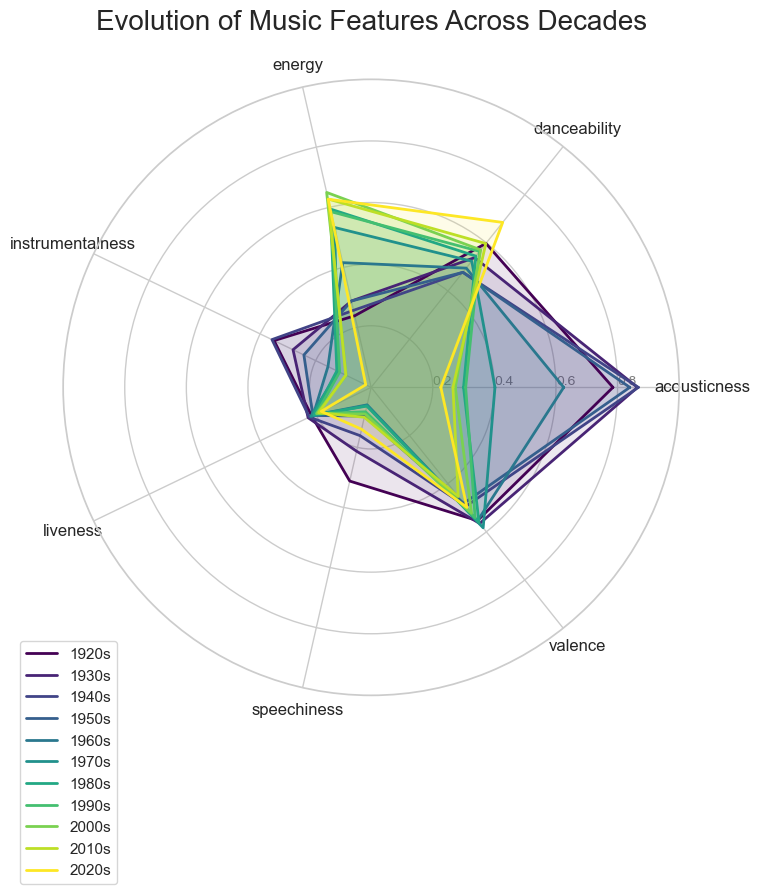

In [76]:
from math import pi
plt.figure(figsize=(12, 7))
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'speechiness', 'valence'] 
# Group by decade and calculate the mean for each feature
df['decade'] = (df['year'] // 10) * 10
decade_features = df.groupby('decade')[audio_features].mean()

# Create a radar chart for each decade
categories = audio_features
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Add decade labels to legend
decades = decade_features.index.tolist()
colors = plt.cm.viridis(np.linspace(0, 1, len(decades)))

for i, decade in enumerate(decades):
    values = decade_features.loc[decade].tolist()
    values += values[:1]  # Close the loop
    
    # Plot values
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f'{decade}s')
    ax.fill(angles, values, color=colors[i], alpha=0.1)

# Set category labels
plt.xticks(angles[:-1], categories, size=12)

# Draw y-axis labels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Evolution of Music Features Across Decades", size=20, pad=20)
plt.show()

#### Evolution of Music popularity over the century

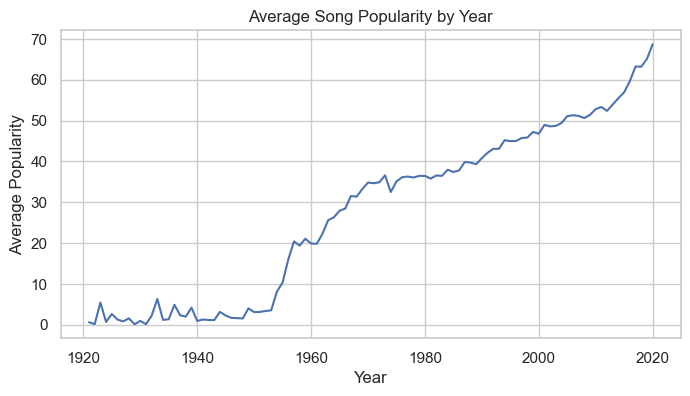

In [78]:
# Year vs Popularity Distribution
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='year', y='popularity', errorbar=None)
plt.title('Average Song Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()